<a href="https://colab.research.google.com/github/plotnikova-ancka/NN/blob/master/exp_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [64]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(40, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [44]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [65]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [46]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [66]:
history_1 = model_1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test)) #100

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9268 - accuracy: 0.7512 - val_loss: 0.4357 - val_accuracy: 0.8921
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4207 - accuracy: 0.8842 - val_loss: 0.3325 - val_accuracy: 0.9100
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3522 - accuracy: 0.9004 - val_loss: 0.2904 - val_accuracy: 0.9195
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3184 - accuracy: 0.9089 - val_loss: 0.2663 - val_accuracy: 0.9260
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.9152 - val_loss: 0.2497 - val_accuracy: 0.9297
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2761 - accuracy: 0.9206 - val_loss: 0.2340 - val_accuracy: 0.9321
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2607 - accuracy: 0.9243 - val_loss: 0.2227 - val_ac

In [53]:
model_2.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0977 - accuracy: 0.9715 - val_loss: 0.0916 - val_accuracy: 0.9728
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0948 - accuracy: 0.9718 - val_loss: 0.0905 - val_accuracy: 0.9727
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913 - accuracy: 0.9733 - val_loss: 0.0883 - val_accuracy: 0.9739
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0888 - accuracy: 0.9741 - val_loss: 0.0855 - val_accuracy: 0.9735
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9750 - val_loss: 0.0841 - val_accuracy: 0.9751
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9749 - val_loss: 0.0825 - val_accuracy: 0.9751
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0819 - accuracy: 0.9755 - val_loss: 0.0822 - val_accuracy:

In [67]:
loss1, acc1 = model_1.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss1, acc1))
loss2, acc2 = model_1.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss2, acc2))
err1 =  (1-acc1)/(1-acc2)
print("errors = ", err1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9728
Loss = 0.09096891433000565, accuracy = 0.9728000164031982
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0472 - accuracy: 0.9867
Loss = 0.047199442982673645, accuracy = 0.9866666793823242
errors =  2.0400007152564195


In [55]:
loss1, acc1 = model_2.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss1, acc1))
loss2, acc2 = model_2.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss2, acc2))
err2 =  (1-acc1)/(1-acc2)
print("errors = ",err2)

313/313 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9783
Loss = 0.07013404369354248, accuracy = 0.9782999753952026
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0391 - accuracy: 0.9891
Loss = 0.039147693663835526, accuracy = 0.9890833497047424
errors =  1.9877914944499349


Построение графика


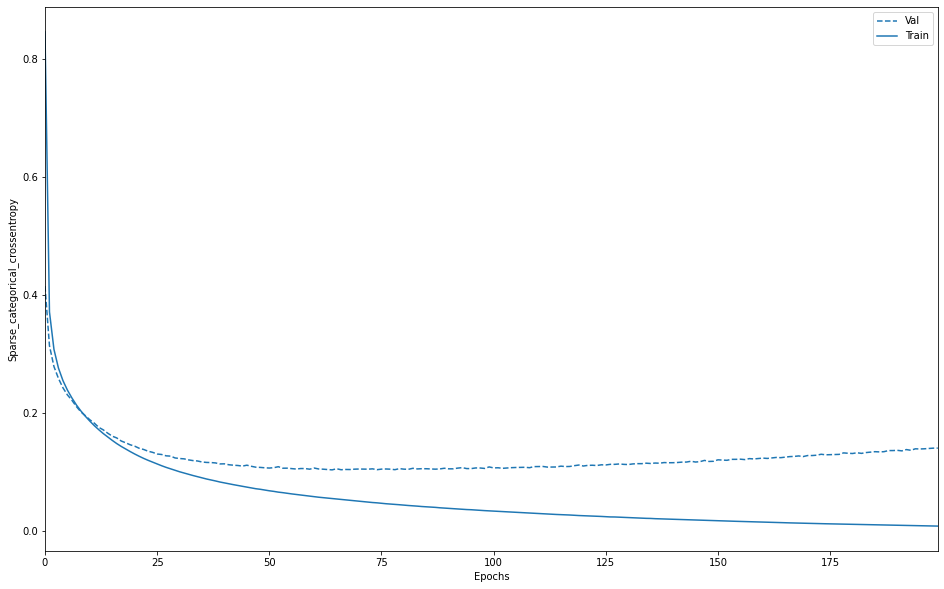

In [62]:
history = history_1
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history.epoch, history.history['val_'+'loss'],
                   '--', label='Val')
plt.plot(history.epoch, history.history["loss"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

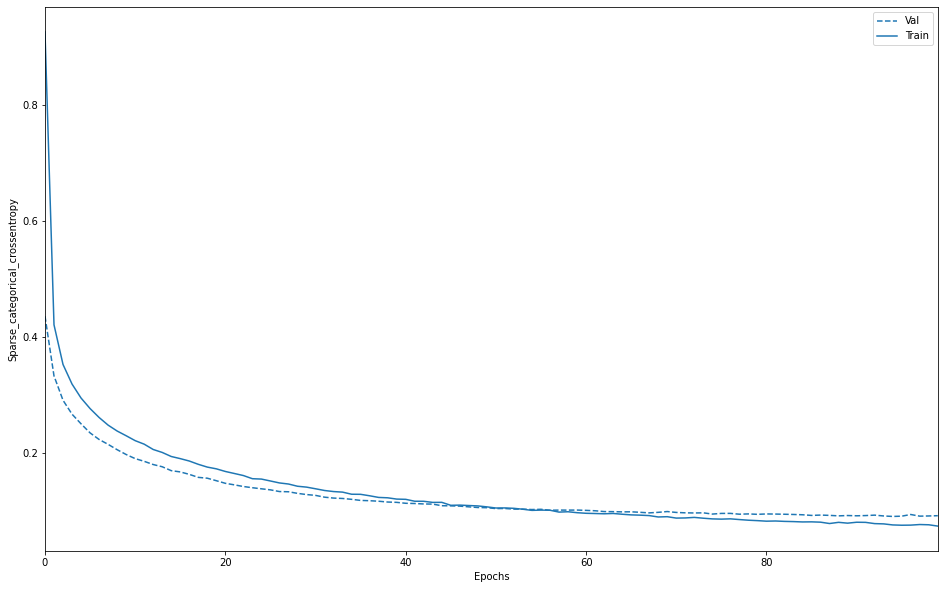

In [68]:
history = history_1
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history.epoch, history.history['val_'+'loss'],
                   '--', label='Val')
plt.plot(history.epoch, history.history["loss"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()